In [1]:
from itertools import count

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [3]:
wdata = pd.read_csv("water_supply.csv")
wdata.head()

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,H3,MI,0.5,MSDELAUNET,20,20,20,20,20,20,...,2,1,2,1,7,7,42,27,22,21
1,H3,HI,0.5,NAN,20,20,20,20,20,20,...,27,27,27,28,28,31,27,27,27,24
2,H3,MI,0.5,NAN,20,20,20,20,20,20,...,19,19,18,18,19,19,19,18,18,24
3,H3,HI,0.5,NAN,20,20,20,20,20,20,...,17,17,17,17,17,17,17,17,17,24
4,H3,HI,0.5,CICASA MMD-15 S,30,10,30,20,30,30,...,14,15,26,27,29,22,27,26,33,32


In [4]:
wdata.shape

(2017, 88)

In [4]:
data = pd.read_csv("testdata.csv")

In [5]:
data.head()

,Time,Water
0,2009-01,16
1,2009-02,15
2,2009-03,15
3,2009-04,14
4,2009-05,54


In [6]:
data_as_frame = pd.DataFrame(data, columns=['Time', 'Water'])
data_as_frame.tail()

,Time,Water
79,2015-08,19
80,2015-09,16
81,2015-10,18
82,2015-11,16
83,2015-12,14


In [7]:
# 4. Lets play with the functions
x = data_as_frame['Time']
Y = data_as_frame['Water']

In [8]:
#Y

In [9]:
window_size= 10
window = np.ones(int(window_size))/float(window_size)

In [10]:
window

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [14]:
window.shape

(10,)

In [12]:
np.convolve(Y, window)

array([ 1.6,  3.1,  4.6,  6. , 11.4, 13.9, 16.1, 18.4, 19.7, 21.5, 21.3,
       21. , 21.3, 21.3, 17.3, 16.3, 17. , 16.1, 16.5, 16.3, 17.2, 17.9,
       18.3, 18.2, 18.9, 19.1, 18.1, 18.7, 19.1, 19.1, 18.3, 17.8, 17.2,
       17.6, 16.9, 16.7, 17. , 17. , 16.6, 17. , 17.5, 18.3, 18.6, 19. ,
       19.7, 19.6, 19.5, 18.9, 19.2, 18.9, 18.6, 18. , 18.2, 18.1, 17.8,
       18.2, 18. , 18.2, 17.8, 17.4, 17.9, 18.1, 17.6, 17.3, 17.9, 18.2,
       18. , 18.3, 18.5, 18.8, 19.1, 18.9, 18.8, 18.3, 17.3, 17. , 16.9,
       16.7, 16.9, 17.2, 16.3, 16.5, 16.6, 16.8, 15.4, 13.6, 12. , 10.3,
        8.3,  6.4,  4.8,  3. ,  1.4])

In [15]:
moving_average = np.convolve(Y, window, 'same')
print(moving_average)

[11.4 13.9 16.1 18.4 19.7 21.5 21.3 21.  21.3 21.3 17.3 16.3 17.  16.1
 16.5 16.3 17.2 17.9 18.3 18.2 18.9 19.1 18.1 18.7 19.1 19.1 18.3 17.8
 17.2 17.6 16.9 16.7 17.  17.  16.6 17.  17.5 18.3 18.6 19.  19.7 19.6
 19.5 18.9 19.2 18.9 18.6 18.  18.2 18.1 17.8 18.2 18.  18.2 17.8 17.4
 17.9 18.1 17.6 17.3 17.9 18.2 18.  18.3 18.5 18.8 19.1 18.9 18.8 18.3
 17.3 17.  16.9 16.7 16.9 17.2 16.3 16.5 16.6 16.8 15.4 13.6 12.  10.3]


In [16]:
type(moving_average)

numpy.ndarray

In [17]:
avg = moving_average.tolist()
print(avg)

[11.4, 13.9, 16.1, 18.4, 19.700000000000003, 21.500000000000004, 21.3, 21.0, 21.3, 21.3, 17.300000000000004, 16.3, 17.0, 16.1, 16.5, 16.300000000000004, 17.2, 17.9, 18.3, 18.200000000000003, 18.900000000000006, 19.100000000000005, 18.1, 18.7, 19.1, 19.1, 18.3, 17.799999999999997, 17.2, 17.6, 16.9, 16.700000000000003, 17.0, 17.000000000000004, 16.599999999999998, 17.0, 17.5, 18.3, 18.599999999999998, 19.0, 19.700000000000003, 19.6, 19.5, 18.9, 19.2, 18.900000000000002, 18.6, 18.0, 18.200000000000003, 18.099999999999998, 17.8, 18.2, 18.0, 18.200000000000003, 17.800000000000004, 17.400000000000002, 17.900000000000002, 18.1, 17.6, 17.3, 17.900000000000006, 18.200000000000003, 18.0, 18.299999999999997, 18.5, 18.8, 19.1, 18.900000000000002, 18.8, 18.3, 17.299999999999997, 17.0, 16.900000000000002, 16.7, 16.9, 17.2, 16.3, 16.5, 16.6, 16.8, 15.4, 13.600000000000001, 12.0, 10.3]


In [18]:
#residual
residual = Y - avg
print(type(residual))

<class 'pandas.core.series.Series'>


In [19]:
residual.head()

0     4.6
1     1.1
2    -1.1
3    -4.4
4    34.3
Name: Water, dtype: float64

In [20]:
# Calculate the variation in the distribution of the residual
std = np.std(residual)
std

4.859363404645993

In [21]:
import itertools
sigma = 1

In [22]:
#Calculate the variation in the distribution of the residual
#print(type(residual))
testing_std = residual.rolling(window_size).std()
testing_std_as_df = pd.DataFrame(testing_std)
rolling_std = testing_std_as_df.replace(np.nan,testing_std_as_df.iloc[window_size - 1]).round(3).iloc[:,0].tolist()

In [23]:
rolling_std

[11.696,
 11.696,
 11.696,
 11.696,
 11.696,
 11.696,
 11.696,
 11.696,
 11.696,
 11.696,
 11.836,
 12.009,
 11.975,
 11.865,
 3.496,
 3.004,
 5.324,
 5.278,
 4.729,
 4.68,
 4.826,
 4.594,
 4.729,
 5.084,
 5.007,
 5.049,
 3.207,
 3.059,
 3.213,
 3.159,
 3.01,
 3.14,
 2.802,
 2.165,
 2.178,
 2.17,
 2.679,
 2.635,
 2.254,
 2.291,
 2.243,
 2.201,
 2.174,
 2.24,
 1.973,
 2.578,
 2.304,
 2.645,
 2.65,
 2.666,
 2.676,
 2.597,
 2.828,
 2.803,
 2.719,
 2.212,
 2.102,
 1.753,
 1.744,
 2.184,
 2.602,
 2.483,
 2.371,
 2.275,
 2.978,
 3.057,
 3.112,
 3.038,
 3.001,
 2.728,
 3.429,
 3.461,
 3.453,
 3.811,
 3.437,
 3.339,
 3.304,
 3.315,
 3.531,
 3.501,
 2.398,
 2.804,
 2.929,
 2.317]

In [24]:
avg_list = avg
text_xlabel="Time"
text_ylabel="Consumed Water"
applying_rolling_std=False

Text(0,0.5,'Consumed Water')

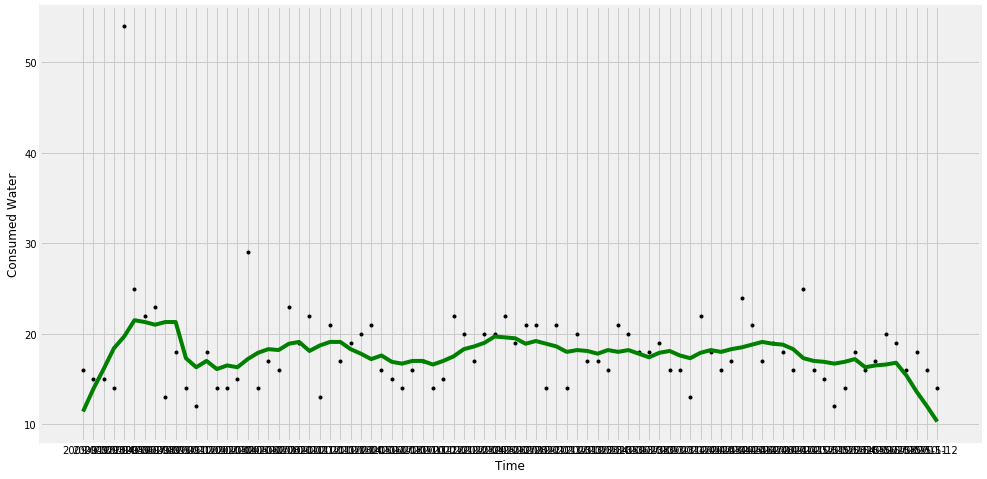

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(x, Y, "k.")
plt.plot(x, moving_average, color='green')
plt.xlabel(text_xlabel)
plt.ylabel(text_ylabel)

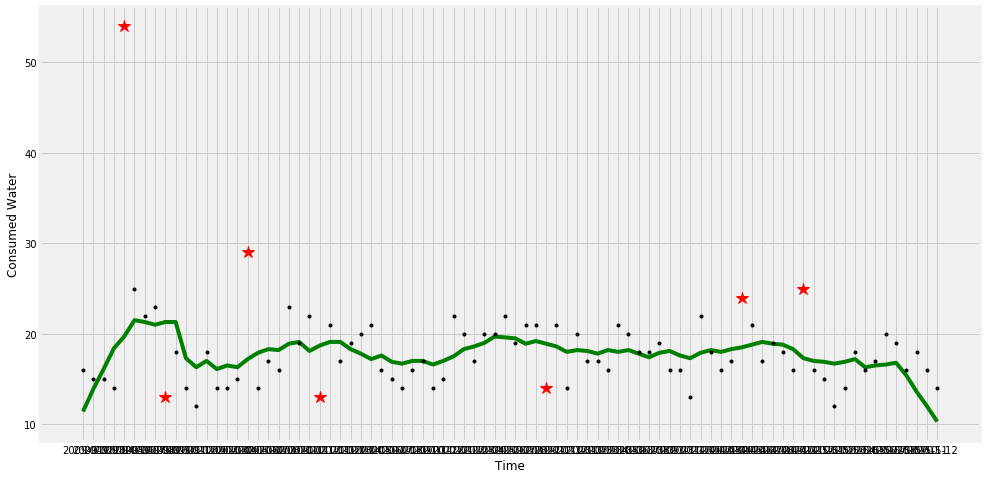

In [26]:
events = {}
if applying_rolling_std:
    events = {'stationary standard_deviation': round(std, 3),'anomalies_dict': collections.OrderedDict([(index, y_i)
                for index, y_i, avg_i, rs_i in zip(count(),Y, avg_list, rolling_std)
                  if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}
else:
    events = {'standard_deviation': round(std, 3),'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(count(), Y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,count=len(events['anomalies_dict']))
plt.figure(figsize=(15, 8))
plt.plot(x, moving_average, color='green')
plt.plot(x, Y, "k.")
plt.xlabel(text_xlabel)
plt.ylabel(text_ylabel)
plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

# add grid and lines and enable the plot
plt.grid(True)12
plt.show()

In [27]:
# Display the anomaly dict
print("Information abfor i in out the anomalies model:{}".format(events))

Information abfor i in out the anomalies model:{'standard_deviation': 4.859, 'anomalies_dict': OrderedDict([(4, 54), (8, 13), (16, 29), (23, 13), (45, 14), (64, 24), (70, 25)])}


# !!! Outlier Detected Successfully !!! #

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
Time     84 non-null object
Water    84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [29]:
data.describe()

,Water
count,84.000000
mean,18.166667
std,5.164367
min,12.000000
25%,15.000000
50%,17.000000
75%,20.000000
max,54.000000


In [30]:
data.head()

,Time,Water
0,2009-01,16
1,2009-02,15
2,2009-03,15
3,2009-04,14
4,2009-05,54


In [31]:
data.dtypes

Time     object
Water     int64
dtype: object

In [32]:
data['Water'].unique()

array([16, 15, 14, 54, 25, 22, 23, 13, 18, 12, 29, 17, 19, 21, 20, 24],
      dtype=int64)

In [33]:
import statsmodels.api as sm
import seaborn as sns

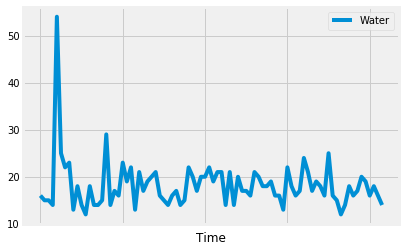

In [34]:
data.plot.line(x = 'Time', y = 'Water')
plt.show()